<a href="https://colab.research.google.com/github/archangelmichael110/Minor-Project/blob/main/NN_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification #make_classification is a dataset generatorfrom sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
# Generating linearly separable dataset
X,y=make_classification(n_samples=1000,n_features=2,n_redundant=0,n_informative=2,n_classes=2,random_state=42)

In [21]:
# Split the dataset 70/30
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

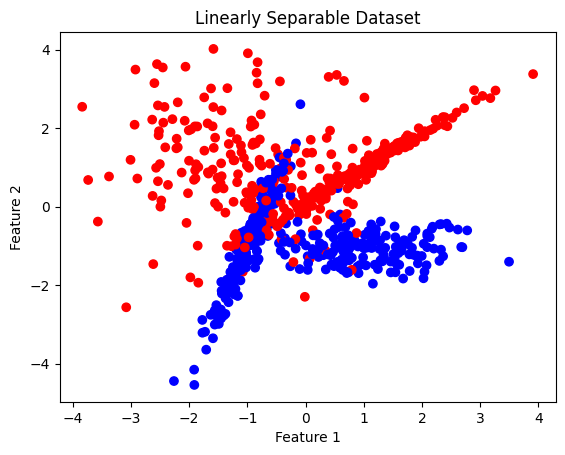

In [22]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap='bwr')
plt.title('Linearly Separable Dataset')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [23]:
#percetron algorithm

class Perceptron:
    def __init__(self, learning_rate=0.01, max_iter=1000):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to {-1, 1}

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 0
                if not condition:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)


In [24]:
#Training the model on training data

percetron = Perceptron(learning_rate=0.01, max_iter=1000)
percetron.fit(X_train, y_train)

#predict on teat data

y_pred = percetron.predict(X_test)

#accuracy

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy *100:.2f}%")

Accuracy: 50.67%


In [27]:
# Function to calculate centroids
def calculate_centroid(X, y, class_label):
    return np.mean(X[y == class_label], axis=0)

# Centroids for positive (C1) and negative (C2) classes
C1 = calculate_centroid(X_train, y_train, 1)  # Positive class
C2 = calculate_centroid(X_train, y_train, 0)  # Negative class

# Midpoint of C1 and C2
M = (C1 + C2) / 2

# Weight vector initialization
initial_weights = C1 - M
initial_bias = -np.dot(initial_weights, M)

print(f"Initial Weights (using centroids): {initial_weights}")
print(f"Initial Bias: {initial_bias}")

Initial Weights (using centroids): [-0.05214671  0.99080921]
Initial Bias: 0.015629442059137487


In [28]:
class PerceptronModified:
    def __init__(self, learning_rate=0.01, max_iter=1000, initial_weights=None, initial_bias=None):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        self.weights = initial_weights
        self.bias = initial_bias

    def fit(self, X, y):
        n_samples, n_features = X.shape
        if self.weights is None:
            self.weights = np.zeros(n_features)
        if self.bias is None:
            self.bias = 0

        y_ = np.where(y <= 0, -1, 1)  # Convert labels to {-1, 1}

        for _ in range(self.max_iter):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.weights) + self.bias) >= 0
                if not condition:
                    self.weights += self.learning_rate * y_[idx] * x_i
                    self.bias += self.learning_rate * y_[idx]

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Initialize and train the modified perceptron
perceptron_modified = PerceptronModified(learning_rate=0.01, max_iter=1000, initial_weights=initial_weights, initial_bias=initial_bias)
perceptron_modified.fit(X_train, y_train)

# Predict on test data and calculate accuracy
y_pred_modified = perceptron_modified.predict(X_test)
accuracy_modified = np.sum(y_pred_modified == y_test) / len(y_test)
print(f"Modified Perceptron Accuracy: {accuracy_modified * 100:.2f}%")


Modified Perceptron Accuracy: 48.67%
